<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-steepest-descent-algorithm" data-toc-modified-id="The-steepest-descent-algorithm-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>The steepest descent algorithm</a></span></li><li><span><a href="#Application-to-the-iterative-resolution-of-the-normal-equations" data-toc-modified-id="Application-to-the-iterative-resolution-of-the-normal-equations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Application to the iterative resolution of the normal equations</a></span><ul class="toc-item"><li><span><a href="#Convergence-analysis" data-toc-modified-id="Convergence-analysis-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Convergence analysis</a></span><ul class="toc-item"><li><span><a href="#Conditions-on-the-step-size" data-toc-modified-id="Conditions-on-the-step-size-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Conditions on the step-size</a></span></li><li><span><a href="#Optimum-step-size" data-toc-modified-id="Optimum-step-size-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Optimum step-size</a></span></li></ul></li><li><span><a href="#An-alternative-view-of-the-Steepest-Descent-Algorithm" data-toc-modified-id="An-alternative-view-of-the-Steepest-Descent-Algorithm-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>An alternative view of the Steepest Descent Algorithm</a></span><ul class="toc-item"><li><span><a href="#The-sum-of-$n$-terms-of-a-geometric-series-of-matrices" data-toc-modified-id="The-sum-of-$n$-terms-of-a-geometric-series-of-matrices-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>The sum of $n$ terms of a geometric series of matrices</a></span></li><li><span><a href="#An-iterative-formula-for-computing-the-solution-of-the-normal-equation" data-toc-modified-id="An-iterative-formula-for-computing-the-solution-of-the-normal-equation-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>An iterative formula for computing the solution of the normal equation</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


## The steepest descent algorithm

Although direct inversion provide the solution in a finite number of steps, it is sometimes preferable to use alternative iterative methods because they may require less numerical precision, are usually computationally and can even be applied in the case of non-quadratic
criteria. The adaptive filtering algorithms we will see later will be obtained by simple modifications of iterative methods. Before indicating how such methods can be useful for solving our normal equations, we begin by describing the Steepest Descent Algorithm (SDA).

Let $f(\xb)$ be a differentiable function of $\xb$ with continuous derivatives. It is then possible to approximate the function at a point $\xb+\Delta\xb$ using the Taylor expansion
$$
f(\xb+\Delta\xb) = f(\xb)+\Delta\xb^T\nabla f(\xb) + \frac{1}{2} \Delta\xb^T\nabla^2 f(\xb)\Delta\xb + \ldots,
$$
where $\nabla f(\xb)$ denotes the gradient of $f$ at $\xb$ and $\nabla^2 f(\xb)$ the Hessian. Restricting ourselves to the first order approximation, we see that if we choose $\Delta\xb^T\nabla f(\xb)<0$, then $f(\xb+\Delta\xb) < f(\xb)$, i.e. $f$ decreases. The higher $|\Delta\xb^T\nabla f(\xb)|$, the most important the decrease.  The scalar product is maximum when the two vectors are colinear, and they must have opposite direction so as to obtain a negative scalar product. This yields 
$$
\Delta\xb = -\nabla f(\xb).
$$
The negative of the gradient is known as the direction of steepest descent. Usually, to keep $\Delta\xb$ small enough for the validity of the Taylor approximation, one uses a small positive factor $\mu$ in front of the gradient. This leads to the following iterative algorithm
\begin{equation}
\eqboxc{
\xb_{k+1} = \xb_{k} -\mu \nabla f(\xb)},
\label{eq:grad_algo}
\end{equation}
which is known as the \textem{steepest descent algorithm}. We begin with an initial guess $\xb_{0}$ of the solution and take the gradient of the function at that point. Then we update the solution in the negative direction of the gradient and we repeat the process until the algorithm  eventually converges where the gradient is zero. Of course, this works if the function at hands possesses a true minimum, and even in that case, the solution may correspond to a local minimum. In addition, the value of the step-size $\mu$ can be crucial for the actual convergence and the speed of convergence to a minimum. 

We give below a simple implementation of a steepest descent algorithm. Beyond formula (\ref{eq:grad_algo}), we have refined by 

- specifying a stopping rule: error less than a given precision `err` or number of iteration greater than a maximum number of iterations `itermax`
- a line-search procedure `line_search` (True by default) which adapts the step-size in order to ensure that the objective function actually decreases
- a verbose mode `verbose`  (True by default) which prints some intermediary  results. 


Some references available online: 

- [Gradient descent](http://en.wikipedia.org/wiki/Gradient_descent)
- [Gradient desxcent (2)](http://www.onmyphd.com/?p=gradient.descent)
- [Conjugate gradients](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)

In [2]:
def grad_algo(f, g, mu, x0=0, eps=0.001, grad_prec=0.0001, itermax=200, line_search=True, verbose=True):
    
    def update_grad(xk,mu):
        return xk-mu*g(xk)
    
    xk=np.zeros((np.size(x0),itermax))
    xk[:,0]=x0
    err=1
    k=0
    while err>eps and k<itermax-1:
        err=norm(xk[:,k]-update_grad(xk[:,k],mu),1)
        xk[:,k+1]=update_grad(xk[:,k],mu)
        if (np.any(np.isnan(xk[:,k+1])) or np.any(np.isinf(xk[:,k+1])) ): break
        m=0
        #line search: look for a step that ensures that the objective function decreases
        if line_search:
            while f(xk[:,k+1])>f(xk[:,k]):
                #print("Updating..",  f(xk[k+1]),f(xk[k]))
                m=m+1
                xk[:,k+1]=update_grad(xk[:,k],mu*(0.5)**m)
        # avoid to stay stalled        
        if norm(g(xk[:,k])+g(xk[:,k-1]),1)<grad_prec: 
            #print("gradients..",  g(xk[k+1]),g(xk[k]))
            mu=mu*0.99
            xk[:,k+1]=update_grad(xk[:,k],mu)
        if verbose: 
            if np.size(x0)==1:
               print("current solution {:2.2f}, error: {:2.2e}, gradient {:2.2e}, objective {:2.2f}".format(xk[0,k+1],err,g(xk[0,k+1]),f(xk[0,k+1])))
            else:
                print("error: {:2.2e}, gradient {:2.2e}, objective {:2.2f}".format(err,norm(g(xk[:,k+1]),2),f(xk[:,k+1])))
               #pass     
        k=k+1
    return xk[:,:k]    

Let us illustrate the SDA in the case of an bivariate quadratic function. You may experiment by modifying the initial guess and the step-size $\mu$. 

In [3]:
def f(x):  #objective function
    return np.sum(x**2) #
def ff(x):
    return np.array([f(xx) for xx in x])

def g(x): #gradient
    return 2*x #

#Test # -------------------------------------------------------------------

def tst(ini0, ini1, mu):
    eps=0.001
    xk=grad_algo(f, g, mu=mu, x0=[ini0, ini1], eps=0.001, grad_prec=0.0001, itermax=200, line_search=False, verbose=False)
    #xk=grad_algo(f, g, mu=0.05, x0=0.5, eps=0.001, grad_prec=eps/10, itermax=200, line_search=False, verbose=True)

    clear_output(wait=True)
    x=np.linspace(-5,5,400)
    plt.plot(x,ff(x))
    x=xk[0,:]
    plt.plot(x,ff(x),'o-')
    x=xk[1,:]
    plt.plot(x,ff(x),'o-')
    
def tsto(val):
    tst(x0.value, x1.value, mu.value)
    
x0=widgets.FloatText(value=3.5)    
x1=widgets.FloatText(value=-4.2) 
mu=widgets.FloatSlider(min=0, max=1.4, step=0.01, value=0.85)
#c=widgets.ContainerWidget(children=(ini0, ini1))
x0.observe(tsto,names=["value"])
x1.observe(tsto,names=["value"])
mu.observe(tsto,names=["value"])
display(widgets.VBox([x0, x1, mu]))
#_=interact(tst, ini0=x0, ini1=x1, mu=mu   )

It is also instructive to look at what happens in the case of a non-quadratic function. 

In [4]:
def f(x):
    return np.sum(x**4/4 - x**3/3 - 9*x**2/2 + 9*x) #np.sum(x**2) #
def ff(x):
    return np.array([f(xx) for xx in x])

def g(x):
    return((x-1)*(x+3)*(x-3)) # 2*x #

#Test # -------------------------------------------------------------------

def tst(ini0, ini1, mu):
    eps=0.001
    xk=grad_algo(f, g, mu=mu, x0=[ini0, ini1], eps=0.001, grad_prec=0.0001, itermax=200, line_search=False, verbose=False)
    #xk=grad_algo(f, g, mu=0.05, x0=0.5, eps=0.001, grad_prec=eps/10, itermax=200, line_search=False, verbose=True)


    x=np.linspace(-5,5,400)
    plt.plot(x,ff(x))
    x=xk[0,:]
    plt.plot(x,ff(x),'o-')
    x=xk[1,:]
    plt.plot(x,ff(x),'o-')
    plt.figure()


    x=np.linspace(-5,5,100)
    xx,yy=meshgrid(x,x)
    z=np.zeros((len(xx),len(yy)))
    for m,a in enumerate(x):
        for n,b in enumerate(x):
            z[n,m]=f(array([a,b]))
            #print(m,n,a,b,z[m,n])
    #z=[[f(array([a,b])) for a in xx] for b in yy]
    h = plt.contour(x,x,z,20)
    plt.plot(xk[0,:],xk[1,:], 'o-')
    
x0=widgets.FloatText(value=0.5)   # or -1.5 
x1=widgets.FloatText(value=1.2)   # 0.8
mu=widgets.FloatSlider(min=0, max=1.4, step=0.01, value=0.07)
#c=widgets.ContainerWidget(children=(ini0, ini1))
_=interact(tst, ini0=x0, ini1=x1, mu=mu   )    

## Application to the iterative resolution of the normal equations

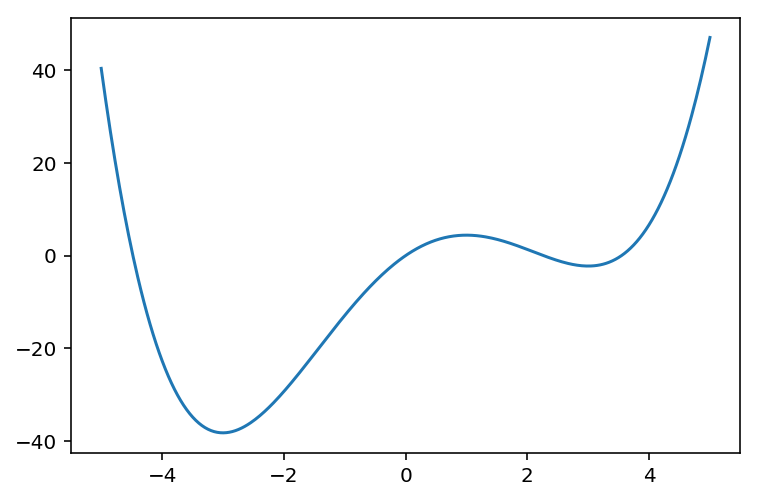

In [5]:

x=np.linspace(-5,5,400)
y=(x-1)*(x+3)*(x-3) # 
y=x**4/4 - x**3/3 - 9*x**2/2 + 9*x
plt.plot(x,y)

x**3 - x**2 - 9*x + 9


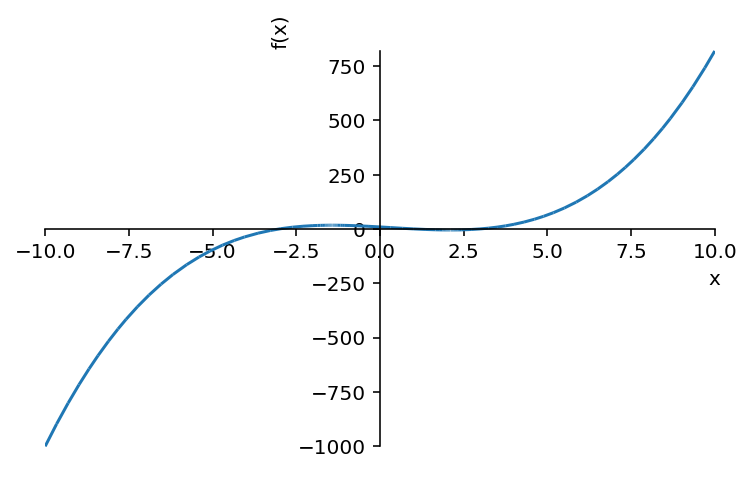

In [6]:
import sympy
x=sympy.symbols('x')
e=sympy.expand((x-1)*(x+3)*(x-3))
print(e)
sympy.integrate(e)
sympy.plot(e)

Definitions
$$\def\ub{\mathbf{u}}
\def\wb{\mathbf{w}}
\def\wbopt{\mathop{\mathbf{w}}\limits^\triangle}
\def\deriv#1#2{\frac{\mathrm{d}#1}{\mathrm{d}#2}}
\def\Ub{\mathbf{U}}
\def\db{\mathbf{d}}
\def\eb{\mathbf{e}}
\def\vb{\mathbf{v}}
\def\Ib{\mathbf{I}}
\def\Vb{\mathbf{V}}
\def\Lambdab{\mathbf{\Lambda}}
$$

Recall that the MMSE criterion  
\begin{align}
J_\mathrm{mse}(w)  & =  \E{e(n)^2}\\
 & = \wb^T \Rb_{uu} \wb - 2\wb^T \Rb_{du} +\sigma_d^2 
\end{align}
has for gradient vector
\begin{align}
\nabla_{\wb} J_\mathrm{mse}(\wb) & = 2 \E{ \ub(n) e(n) } \\ 
& = 2 \left(\Rb_{uu} \wb -  \Rb_{du} \right).     
\end{align}
The derivative is zero if and only if $\Rb_{uu} \wb = \Rb_{du} $ which is the normal equation. 

Instead of directly solving the normal equation by taking the inverse of $\Rb_{uu}$, we can also minimize the original criterion using a SDA algorithm. Since the MMSE criterion is a quadratic form in $\wb$, it has an only minimum $\wbopt$ which will be reached regardless of the initial condition. 



Beginning  with the general formulation (\ref{eq:grad_algo}) of the SDA, and using the expression of the gradient of the MMSE, we readily obtain
$$
\eqboxd{
\begin{align}
\wb(n+1) & = \wb(n) - \mu \E{ \ub(n) e(n) } \\
& = \wb(n) - \mu \left(\Rb_{uu} \wb(n) -  \Rb_{du} \right) \\
\end{align}
}
\label{eq:grad}
$$
(we absorbed the factor 2 in the gradient into the constant $\mu$). It is important to stress that here, the index $n$ represents the iterations of the algorithm, \textem{and has nothing to do with time}. \footnote{Actually the normal equation we are solving is independent of time -- it is only in the non-stationary case that normal equation depends on time; in such a case, the SDA would depend on both iterations and time.}

Even before studying convergence properties of the resulting algorithm, let us examine its behavior in the very same example of filter identification we used in section \ref{sec:filterident}

/usr/local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


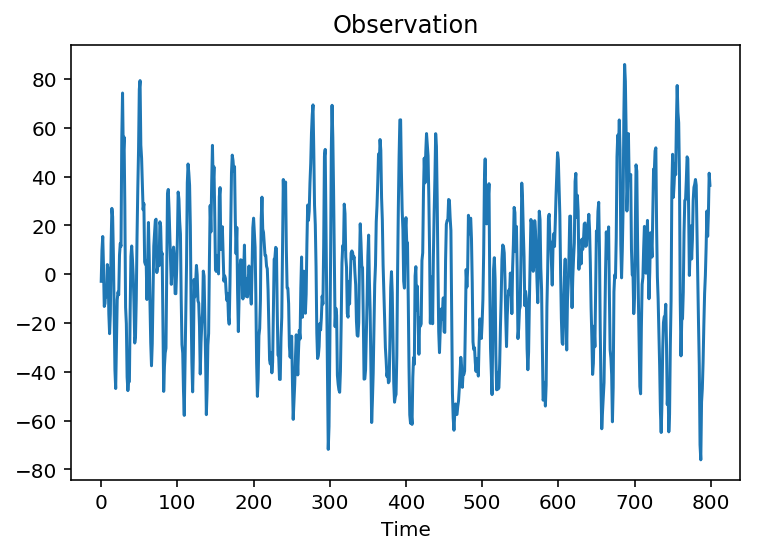

In [7]:
np.random.seed(749)
from scipy.signal import lfilter
# test
N=800
x=lfilter([1, 1], [1], np.random.randn(N))
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
y=lfilter(htest,[1],x)+0.1*randn(N)
plt.plot(y)
plt.xlabel("Time")
plt.title("Observation")
figcaption("System output in an identification problem")

Implement a function that iterates the SDA, beginning with an initial condition `winit` until the (norm of the) increment between two successive updates is less than a given precision `eps` (use a `while` loop). The syntax of the function should be
```python
sda(Ruu,Rdu, winit, mu, eps)
```
It will return the optimum vector w and the number of iterations.

In [8]:
# DO IT YOURSELF!
#def sda(Ruu,Rdu, winit, mu=0.05, eps=0.001):
#    itermax=2000
#    err=100
#    k=0
#    w=winit
#    while ...
#
#    return w,niter

In [9]:
def sda(Ruu,Rdu, winit, mu=0.05, eps=0.001, verbose=False):
    itermax=2000
    err=(100, 100)
    k=0
    w=winit
    while np.linalg.norm(err,2)>eps and k<itermax-1:
        err=(Ruu.dot(w)-Rdu)
        w=w-mu*err    
        k+=1
        if verbose: print("Iteration {0:d}, error: {1:2.2e}".format(k,np.linalg.norm(err,2)))
    return w, k

As an example, we test the implementation with $\mu=0.05$:

In [10]:
from correlation import xcorr
from scipy.linalg import toeplitz
from numpy.linalg import inv
mu=0.05
(u, d, q)=(x, y, 6) 
c=xcorr(u,u,maxlags=q)[0][q::] #correlation vector
Ruu=toeplitz(c)
Rdu=xcorr(d,u,maxlags=q)[0][q::]

In [11]:
w, nbiter=sda(Ruu,Rdu, winit=np.zeros(q+1), mu=0.05, eps=0.001, verbose=False)
print("for mu={0:1.3f}, number of iterations: {1:}".format(mu,nbiter))
print("Identified filter", w)
print("True filter", htest)

for mu=0.050, number of iterations: 567
Identified filter [10.00337544  6.99712839  6.96204905  6.93485836  3.00723524 -0.01073802
 -0.02476235]
True filter [10.  7.  7.  7.  3.  0.]


We can also study the behavior and performance of the SDA as a function of the step-size $\mu$.

Last identified filter [10.00463266  6.9950947   6.96491799  6.93197326  3.01010416 -0.01277169
 -0.02350515]
true filter [10.  7.  7.  7.  3.  0.]


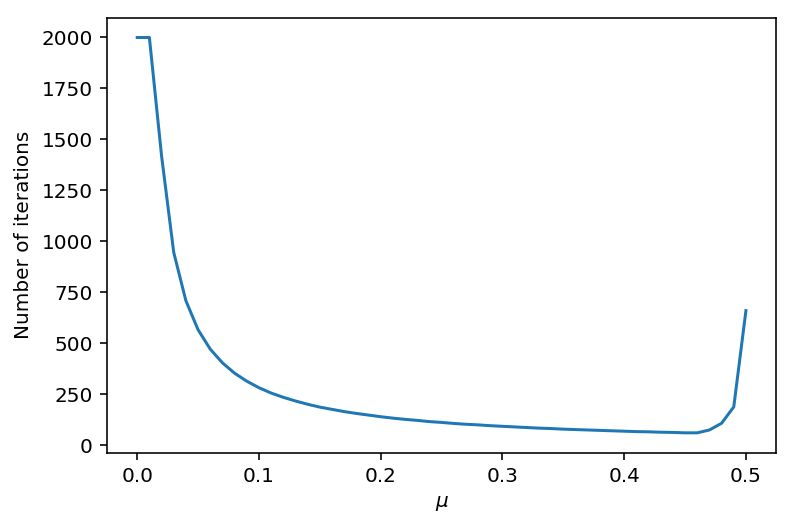

In [12]:
from correlation import xcorr
from scipy.linalg import toeplitz
from numpy.linalg import inv

u=x
d=y
q=6
c=xcorr(u,u,maxlags=q)[0][q::] #correlation vector
Ruu=toeplitz(c)
Rdu=xcorr(d,u,maxlags=q)[0][q::]
wopt=inv(Ruu).dot(Rdu)
k=0
mu_iter=np.arange(0,0.51,0.01)
niter=np.empty(np.shape(mu_iter))

for mu in mu_iter:
    w, nbiter=sda(Ruu,Rdu, winit=np.zeros(q+1), mu=mu, eps=0.001, verbose=False)
    niter[k]=nbiter
    k+=1
    #print("for mu={0:1.3f}, number of iterations: {1:}".format(mu,nbiter))
print("Last identified filter", w)
print("true filter", htest)
plt.plot(mu_iter,niter)
plt.xlabel("$\mu$")
plt.ylabel("Number of iterations")
figcaption("Number of iterations of the gradient algorithm as a function of $\mu$", 
           label="fig:itergrad")


We observe that the number of iterations needed to obtain the convergence (up to a given precision) essentially decreases with $\mu$, up to a minimum. After this minimum, the number of iterations shortly increases, up to a value of $\mu$ where the algorithm begins to diverge. 

### Convergence analysis

The choice of the step-size is crucial. If the steps are too large, then the algorithm may diverge. If they are too small, then convergence may take a long time

#### Conditions on the step-size

Let $\vb(n)=\wb(n)-\wbopt$ denote the error between the filter at step $n$ and the optimum filter $\wbopt$. Subtracting $\wbopt$ from both sides of the SDA
$$
\wb(n+1) = \wb(n) - \mu \left(\Rb_{uu} \wb(n) -  \Rb_{du} \right)
$$
we get
$$
\vb(n+1) = \vb(n) - \mu \left(\Rb_{uu} \wb(n) -  \Rb_{du} \right).
$$
Using the fact that $\Rb_{du}=\Rb_{uu} \wbopt(n)$, it comes
\begin{align}
\vb(n+1) & = \vb(n) - \mu \left(\Rb_{uu} \wb(n) -  \Rb_{uu} \wbopt(n) \right) \\ 
 & = \vb(n) - \mu  \Rb_{uu} \vb(n) \\
& = \left(\Ib-\mu\Rb_{uu}\right)\vb(n).
\end{align}

It is then immediate to express the error at iteration $n+1$ in terms of the initial error $\vb(0)$:
$$
\vb(n+1) =   \left(\Ib-\mu\Rb_{uu}\right)^{n+1}\vb(0).
$$
Clearly, if the algorithm converges, the error shall tends to zero and so doing forget the initial conditions. Here, the error decreases to zero if $\left(\Ib-\Rb_{uu}\right)^{n+1}$ tends to the null matrix. This happens if all the eigenvalues of $\left(\Ib-\Rb_{uu}\right)$ have a modulus inferior to 1. To see this, let us introduce the eigen-decomposition of $\Rb_{uu}$:
$$
\Rb_{uu} = \Vb \Lambdab\Vb^H
$$
where $\Vb$ is the matrix of right eigenvectors of $\Rb_{uu}$, and $\Lambdab$ the corresponding diagonal matrix of eigenvalues. The superscript $^H$ indicates the conjugate transposition (that is transposition plus conjugation). In the case of a correlation matrix, the eigenvalues are all non-negative, and the eigenvectors can be chosen normed and orthogonal to each other. In other terms, $\Vb$ is unitary:
$$
\Vb \Vb^H = \Ib \text{ or } \Vb^{-1}= \Vb^H. 
$$
Therefore, $\left(\Ib-\mu\Rb_{uu}\right)$ can be put under the form $\Vb\left(\Ib-\mu\Lambdab\right)\Vb^H$. This shows that the eigenvalues of the matrix have the form $1-\mu \lambda_i$, where the $\lambda_i$ are the eigenvalues of the correlation matrix. For the power $(n+1)$ we then obtain
$$
\left(\Ib-\mu\Rb_{uu}\right)^{n+1} = \Vb\left(\Ib-\mu\Lambdab\right)^{n+1}\Vb^H.
\label{eq:matpowern}
$$
Hence we see that this matrix will converge to zero if and only if 
$$
|1-\mu \lambda_i|< 1 {~~~~}\forall i.
$$
- If $1-\mu \lambda_i>0$, this yields $1-\mu \lambda_i< 1$ and therefore since $\lambda_i\geq 0$ implies $\mu\geq0$;
- If $1-\mu \lambda_i<0$, we obtain  $\mu \lambda_i-1< 1$, so that $\mu<2/\lambda_i$. Since this must be true for all $\lambda_i$, we can only keep the most restrictive inequality: $\mu<2/\lambda_\mathrm{max}$, where $\lambda_\mathrm{max}$ denotes the maximum eigenvalue. 

Finally, we obtain the following condition
$$
\eqboxd{
\displaystyle{
0 \leq \mu<\frac{2}{\lambda_\mathrm{max}}
}
}
$$
on the step-size, for ensuring the convergence of the algorithm. 

\footnote{
The correlation matrix $\Rb_{uu}$ is non-negative definite. This means that $\forall \vb$, $\vb^H\Rb_{uu}\vb\geq0$. This is easy to check. Indeed, since $\Rb_{uu}=\E{\ub(n)\ub(n)^H}$, we have $\vb^H\Rb_{uu}\vb = \E{\vb^H\ub(n)\ub(n)^H\vb} = \E{||\vb^H\ub(n)||^2} \geq0$. Let now $\vb$ be any eigenvector of $\Rb_{uu}$ with eigenvalue $\lambda$. In such a case, we have $\vb^H\Rb_{uu}\vb = \vb^H\lambda\vb=\lambda||\vb||^2$. Since we just seen that $\vb^H\Rb_{uu}\vb \geq 0$, we deduce that all the eigenvalues $\lambda$ are non-negative. 
}


#### Optimum step-size

From (\ref{eq:matpowern}), we see that the speed of convergence will be limited by slowest eigenvalue, that is by the eigenvalue whose modulus is the nearest to one. Hence, in order to minimize the convergence time, we have to select the maximum of the $1-\mu\lambda_k$, with respect to $k$, and minimize that value with respect to $\mu$. Hence we face a [minimax](http://en.wikipedia.org/wiki/Minimax) problem: 
$$
\min_\mu \max_k |1-\mu\lambda_k|
\label{eq:minmax}
$$
Suppose that there exists a $\mu_\mathrm{opt}$ that realizes the minimum with respect to $\mu$. For $\mu>\mu_\mathrm{opt}$, we then have
$$
\mu\lambda_k -1 > \mu_\mathrm{opt} \lambda_k-1 \geq \mu_\mathrm{opt} \lambda_\mathrm{min}-1 
$$
On the other hand, for $\mu<\mu_\mathrm{opt}$, we  have
$$
\mu\lambda_k -1 < \mu_\mathrm{opt} \lambda_k-1
$$
or
$$
1-\mu\lambda_k > 1-\mu_\mathrm{opt} \lambda_k \geq 1-\mu_\mathrm{opt} \lambda_\mathrm{max}
$$
Hence, we obtain that the solution of (\ref{eq:minmax}) is $1-\mu_\mathrm{opt} \lambda_\mathrm{max}$ from above and $\mu_\mathrm{opt} \lambda_\mathrm{min}-1$ from below. Of course we have, by continuity, 
$$
1-\mu_\mathrm{opt} \lambda_\mathrm{max} = \mu_\mathrm{opt} \lambda_\mathrm{min}-1
$$
which yields 
$$
\eqboxc{
\displaystyle{
\mu_\mathrm{opt} = \frac{2}{ \lambda_\mathrm{max} +  \lambda_\mathrm{min} }
}}
\label{eq:muopt}
$$

These two results: convergence condition and optimum step-size completely corresponds to what we observed numerically in figure \ref{fig:itergrad}. If we compute the eigenvalues of the correlation matrix $\Rb_{uu}$, we obtain

In [13]:
L,V=np.linalg.eig(Ruu)
print("Maximum step-size: ", 2/(np.max(L)))
print("Optimum step-size: ", 2/(np.max(L)+np.min(L)))

Maximum step-size:  0.504097034235286
Optimum step-size:  0.4840425320713463


It is worth recalling that we introduced the iterative algorithm in order to avoid the direct inversion of the correlation matrix, possibly for computational load reasons. However, computing the eigenvalues of the correlation matrix is at least as complicated as computing the inverse. Thus we do not gain anything if we compute the optimum step-size (\ref{eq:muopt}). Fortunately, we can use the following value:
$$
\mu = \frac{2}{\mathrm{Tr}\left[\Rb_{uu}\right]},
$$
where $\mathrm{Tr}$ denotes the trace operator, that is the sum of the eigenvalues. Sine we know that the trace is also the sum of therms in the main diagonal, and since the matrix is Toeplitz, we also have
$$
\mu = \frac{2}{pR_{uu}(0)},
$$
where $R_{uu}(0)=\E{|u(n)|^2}$ and $p$ is the dimension of the correlation matrix. 

### An alternative view of the Steepest Descent Algorithm 

#### The sum of $n$ terms of a geometric series of matrices

\begin{proposition}
The sum of the first $n$ terms of the geometric series $B^k$, where $B$ is any square matrix
$$
S_n=B^0+B+B^2+\ldots+B^k+\ldots+B^n  
\label{eq:geometricseries}
$$
is given by 
\begin{equation}
\eqboxd{
S_n=(1-B)^{-1}(1-B^{n+1})
}.
\label{eq:sumgeometricseries}
\end{equation}

If the [spectral radius](http://en.wikipedia.org/wiki/Spectral_radius) of $B$ is less than 1, then $\lim_{n\rightarrow\infty} B^n=0$, and 
$$
\eqboxc{
S_\infty=(1-B)^{-1}
}.
\label{eq:limsumgeometricseries}
$$
\end{proposition}

\begin{proof}
Consider the geometric series
$$
B^0+B+B^2+\ldots+B^k+\ldots
$$
where B is any matrix. The sum of the first $n$ terms of this geometric series is given by (\ref{eq:geometricseries}).
Of course, we also have 
\begin{align}
BS_n & =B+B^2+\ldots+B^n+B^{n+1} \\
   & = S-1+ B^{n+1} . 
\end{align}   
Therefore we have
$$
(B-1)S_n=-1+ B^{n+1},
$$
and finally the result (\ref{eq:sumgeometricseries}) follows after applying the left inverse of $(B-1)$ to both sides.
\end{proof}

**Application** -- This can be applied for instance to the matrix $B=1-\mu A$. Here it gives
$$
\eqboxb{
\displaystyle{
\mu S_\infty=\mu \sum_{k=0}^{+\infty} (1-\mu A)^k = A^{-1}
}}\label{eq:inv_by_series}
$$
provided that the spectral radius of $(1-\mu A)$ is less than one. 

\begin{remark} If $B$ has a spectral radius less than one, then $(1-B)$ is invertible. 
Consider the eigendecomposition of $B$ as:
$$
B=V\Lambda V^{-1},
$$
where V is the matrix of right eigenvectors of $B$, and $\Lambda$ the corresponding diagonal matrix of eigenvalues. Then $(1-A)=(VV^{-1}- V \Lambda V^{-1})=V(1-\Lambda)V^{-1}$. The last relation is noting but a possible eigendecomposition of $(1- B)$. This shows that the corresponding eigenvalues have the form $1-\lambda_i$. If all the eigenvalues have a modulus inferior to 1, then $1-\lambda_i$ is never equal to zero and the matrix $(1-B)$ is invertible. 
\end{remark}

Let us illustrate numerically that the sum of the geometric series generated by $B$ is indeed $(I-B)^{-1}$

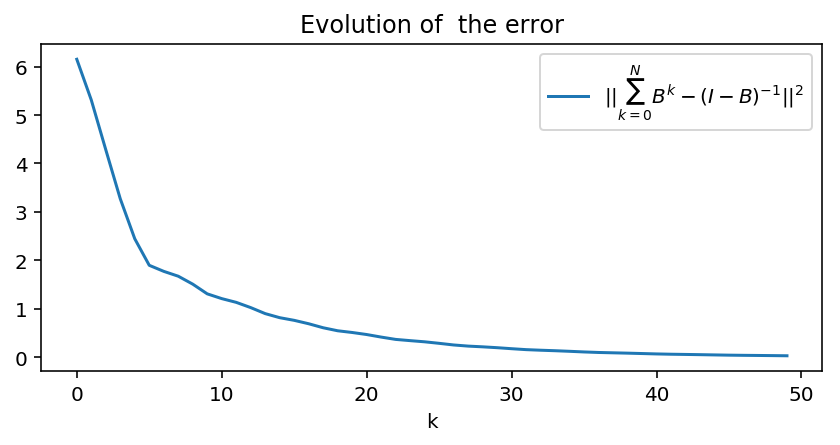

In [14]:
# We generate a random matrix B, compute its eigendecomposition and normalize by the maximum
# eignevalue. Therefore, the spectal radius is inferior to 1, and the property applies
p=50
B=np.random.randn(p,p)
L,V= np.linalg.eig(B)
ll=np.max(np.abs(L))
B=B/(1.1*ll)

# Now we compute the true inverse of (I-B):
I=np.eye(p)
IBi=np.linalg.inv(I-B)

N=50  # number of terms in the sum
err=np.zeros(N) # Evolution of error
S=np.zeros(p)
C=I   # initial C

for k in np.arange(N):
    S=S+C
    C=C.dot(B)
    err[k]=np.linalg.norm(IBi-S,2)

plt.figure(figsize=(7,3))
plt.plot((abs(err)), label="$||\sum_{k=0}^N B^k - (I-B)^{-1}||^2$")
plt.title("Evolution of  the error")
plt.xlabel("k")
_=plt.legend()

#### An iterative formula for computing the solution of the normal equation

Let us now return to the normal equation 
$$
\wb = \Rb_{uu}^{-1} \Rb_{du}. 
$$
By the property (\ref{eq:inv_by_series}), the inverse of the correlation matrix can be computed as
$$
\Rb_{uu}^{-1} = \mu \sum_{k=0}^{+\infty} (1-\mu \Rb_{uu})^k.
$$
Therefore, if we use a sum of order $n$, we have
$$
\wb(n) = \mu \sum_{k=0}^{n} (1-\mu \Rb_{uu})^k  \Rb_{du}. 
$$
The term of rank $(n+1)$ can then be expressed as
\begin{align}
\wb(n+1) & = \mu \sum_{k=0}^{n+1} (1-\mu \Rb_{uu})^k  \Rb_{du} \\
& = \mu (1-\mu \Rb_{uu}) \sum_{k=0}^{n} (1-\mu \Rb_{uu})^k  \Rb_{du} + \mu (1-\mu \Rb_{uu})^0  \Rb_{du}\\
& = (1-\mu \Rb_{uu}) \wb(n) + \mu   \Rb_{du}\\
\end{align}
that is also
$$
\eqboxc{
\wb(n+1)  = \wb(n) -\mu (\Rb_{uu} \wb(n) -  \Rb_{du})
}
$$
Hence, we obtain an iterative formula for computing the solution of the normal equation (\ref{eq:normaleq}), without explicitly computing the inverse of the correlation matrix. It is an exact algorithm, which converges to the true solution:
$$
\lim_{n\rightarrow\infty} \wb(n) = \wbopt =  \Rb_{uu}^{-1} \Rb_{du}.
$$
As we saw above, this algorithm also appears as a steepest descent algorithm applied to the minimization of the Mean Square Error. 

A few references --
```
[http://nowak.ece.wisc.edu/ece830/ece830\\_spring13\\_adaptive\\_filtering.pdf](http://nowak.ece.wisc.edu/ece830/ece830\\_spring13\\_adaptive\\_filtering.pdf)

[http://www.roma1.infn.it/exp/cuore/pdfnew/ch07.pdf](http://www.roma1.infn.it/exp/cuore/pdfnew/ch07.pdf)

[http://www.ece.utah.edu/~mathews/ece6550/chapter4.pdf](http://www.ece.utah.edu/~mathews/ece6550/chapter4.pdf)

[http://en.wikipedia.org/wiki/Least\\_mean\\_squares\\_filter#Normalised\\_least\\_mean\\_squares\\_filter\\_.28NLMS.29](http://en.wikipedia.org/wiki/Least\\_mean\\_squares\\_filter#Normalised\\_least\\_mean\\_squares\\_filter\\_.28NLMS.29)
```


----
<div align=right> [Index](toc.ipynb) - [Back](Optimum_filtering.ipynb) - [Next](Adaptive_versions.ipynb)</div>